# Summary of Investigation

- Dataset: NBA players and common player statistics (free throw %, points generated, etc) for recent years.
- Tools:
    - Numpy
    - Pandas
    - Scipy
    - Matplotlib
- Investigative question:
    - Is there a difference in mean of the following player stats between position types?
        - Aggression (measured in fouls per minute played)
        - Free throw %
        - Points per minute played
- Findings:
    - 1-way ANOVA test indicated no significant difference in these player stats between position types.

# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)


In [2]:
df_bball = pd.read_csv('data/nba_data.csv')
df_bball.head()

,Season,Player,Position,Age,Team,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_%,3_Pointers_Made,3_Pointers_Attempted,3_Point_%,2_Pointers,2_Pointers_Attempted,2_Point_%,effective_Field_Goal_%,Free_Throws,Free_Throws_Attempted,Free_Throw_%,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points
0,2017,Alex Abrines,Shooting Guard,23,Oklahoma City,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,2017,Quincy Acy,Power Forward,26,Dallas,6,0,8.0,0.8,2.8,0.294,0.2,1.2,0.143,0.7,1.7,0.400,0.324,0.3,0.5,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
2,2017,Quincy Acy,Power Forward,26,Brooklyn,32,1,15.9,2.0,4.8,0.425,1.1,2.6,0.434,0.9,2.2,0.414,0.542,1.3,1.8,0.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5
3,2017,Steven Adams,Center,23,Oklahoma City,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3
4,2017,Arron Afflalo,Shooting Guard,31,Sacramento,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4


# Exploratory Data Analysis


In [3]:
#Correlation Matrix of the dataframe

df_bball.corr().round(2)

,Season,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_%,3_Pointers_Made,3_Pointers_Attempted,3_Point_%,2_Pointers,2_Pointers_Attempted,2_Point_%,effective_Field_Goal_%,Free_Throws,Free_Throws_Attempted,Free_Throw_%,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points
Season,1.00,-0.00,0.00,-0.00,0.01,0.03,0.03,0.05,0.10,0.10,0.05,-0.00,-0.02,0.09,0.09,0.02,0.02,0.06,-0.03,0.04,0.02,0.01,0.00,-0.00,-0.02,0.01,0.04
Age,-0.00,1.00,0.03,0.01,0.08,0.02,0.02,0.02,0.09,0.08,0.05,-0.01,-0.01,0.01,0.07,-0.01,-0.03,0.10,-0.04,0.06,0.03,0.09,0.02,-0.03,0.01,0.04,0.02
Games_Played,0.00,0.03,1.00,0.64,0.64,0.55,0.52,0.28,0.34,0.32,0.12,0.51,0.48,0.24,0.31,0.43,0.43,0.19,0.34,0.50,0.47,0.34,0.47,0.31,0.43,0.53,0.54
Games_Started,-0.00,0.01,0.64,1.00,0.79,0.74,0.71,0.22,0.37,0.36,0.07,0.70,0.69,0.17,0.21,0.61,0.62,0.14,0.43,0.66,0.62,0.50,0.61,0.40,0.62,0.57,0.72
Minutes_Played,0.01,0.08,0.64,0.79,1.00,0.90,0.90,0.22,0.56,0.57,0.19,0.81,0.82,0.18,0.26,0.73,0.73,0.26,0.43,0.73,0.67,0.66,0.76,0.38,0.79,0.72,0.89
Field_Goals_Made,0.03,0.02,0.55,0.74,0.90,1.00,0.98,0.29,0.52,0.52,0.17,0.94,0.94,0.23,0.29,0.84,0.83,0.27,0.42,0.71,0.66,0.63,0.67,0.39,0.81,0.63,0.99
Field_Goals_Attempted,0.03,0.02,0.52,0.71,0.90,0.98,1.00,0.15,0.61,0.62,0.20,0.89,0.92,0.11,0.18,0.83,0.81,0.31,0.33,0.65,0.58,0.67,0.69,0.29,0.83,0.59,0.98
Field_Goal_%,0.05,0.02,0.28,0.22,0.22,0.29,0.15,1.00,-0.08,-0.14,0.10,0.36,0.26,0.86,0.92,0.18,0.23,-0.10,0.40,0.34,0.38,0.02,0.11,0.37,0.15,0.33,0.24
3_Pointers_Made,0.10,0.09,0.34,0.37,0.56,0.52,0.61,-0.08,1.00,0.98,0.51,0.22,0.25,-0.03,0.20,0.41,0.33,0.39,-0.23,0.13,0.02,0.48,0.47,-0.15,0.43,0.23,0.60
3_Pointers_Attempted,0.10,0.08,0.32,0.36,0.57,0.52,0.62,-0.14,0.98,1.00,0.45,0.22,0.26,-0.04,0.13,0.42,0.34,0.39,-0.25,0.13,0.01,0.50,0.49,-0.16,0.46,0.23,0.60


In [4]:
# Interested in whether there is a difference in fouls made by players depending on what position they play

df_bball['Fouls_Per_Minute'] = df_bball['Personal_Fouls'] / df_bball['Minutes_Played']

/home/alex/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


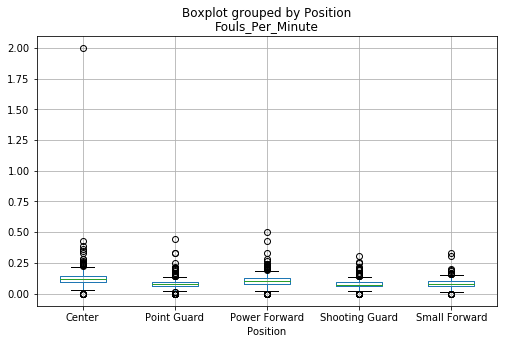

In [5]:
#make a boxplot of fouls per minute

df_bball.boxplot(column='Fouls_Per_Minute', by='Position', figsize=(8,5));

In [6]:
# that pesky outlier
df_bball.iloc[2425]

Season                             2013
Player                     Damion James
Position                  Small Forward
Age                                  25
Team                           Brooklyn
Games_Played                          2
Games_Started                         0
Minutes_Played                        0
Field_Goals_Made                      0
Field_Goals_Attempted                 0
Field_Goal_%                        NaN
3_Pointers_Made                       0
3_Pointers_Attempted                  0
3_Point_%                           NaN
2_Pointers                            0
2_Pointers_Attempted                  0
2_Point_%                           NaN
effective_Field_Goal_%              NaN
Free_Throws                           0
Free_Throws_Attempted                 0
Free_Throw_%                        NaN
Offensive_Rebounds                    0
Defensive_Rebounds                  0.5
Total_Rebounds                      0.5
Assists                               0


/home/alex/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


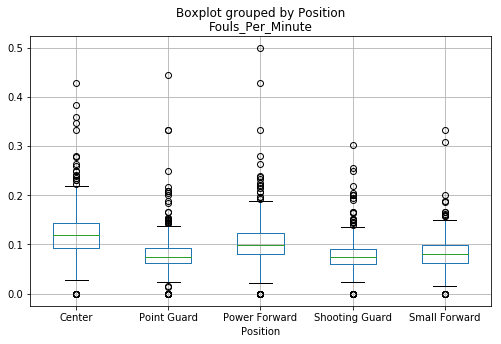

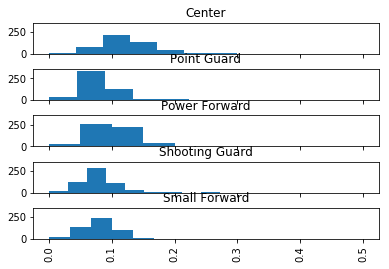

In [7]:
#make a boxplot of fouls per minute without the top 
df_bball_under1_fpm = df_bball[df_bball['Fouls_Per_Minute']<1]
df_bball_under1_fpm.boxplot(column='Fouls_Per_Minute', by='Position', figsize=(8,5));
df_bball_under1_fpm.hist(column='Fouls_Per_Minute', by='Position',layout=(5,1),sharex=True, sharey=True);

In [8]:
# What's the mean of each group? Variance?

print('\nMean of the populations\n')
print(df_bball_under1_fpm.groupby('Position').mean().loc[:,'Fouls_Per_Minute'])

print('\nVariance of the populations\n')
print(df_bball_under1_fpm.groupby('Position').var().loc[:,'Fouls_Per_Minute'])


Mean of the populations

Position
Center            0.124412
Point Guard       0.081154
Power Forward     0.104395
Shooting Guard    0.078808
Small Forward     0.082085
Name: Fouls_Per_Minute, dtype: float64

Variance of the populations

Position
Center            0.002443
Point Guard       0.001473
Power Forward     0.002068
Shooting Guard    0.001025
Small Forward     0.001050
Name: Fouls_Per_Minute, dtype: float64


# Our Question:

Is there a difference in mean of a variable between position types?
        - Aggression (measured in fouls per minute played)
        - Free throw %
        - Points per minute played



## Hypothesis testing framework:
 - H0: there is no difference in the mean value of a given player stat between position groups
 - H1: there is a difference in the mean value of a given player stat between position groups
 - alpha: 0.05
 - chosen test: Anova, because we are comparing the mean of a given player stat across many groups.

# Anova

### Assumptions
 1. The samples are independent.
     - we are considering player + year combinations to be independent samples
     - we are also considering player + team combinations within the same year to be indepedent samples
 2. Each sample is from a normally distributed population.
     - we are comfortable assuming normal distribution for this exercise
 3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
     - we will normalize the values of each group prior to putting them in the anova in order to meet this criterium.

# Cleaning

 1. Drop where minutes played <= 0
     - We're normalizing by minutes played, if minutes played > 0 we're just going to assume that the games played is missing data rather than actually being zero
 2. Later on we will drop outliers that are outside of 3 standard deviations for each sample that we  are comparing

In [9]:
df_bball = df_bball[df_bball['Minutes_Played']>0]

# Filter out outliers

In [10]:
def filterSeries(arr, sd_filter=3):
    """
    Takes in a NumPy series and filters out outliers based on standard deviations.
    Default standard devations is 3
    """
    
    mean = np.mean(arr, axis=0)
    sd = np.std(arr, axis=0)
    
    final_list = [x for x in arr if (x > mean - (sd_filter * sd))]
    final_list = [x for x in final_list if (x < mean + (sd_filter * sd))]
    print(final_list)
    
    return pd.Series(final_list)

# Make new variables to control for time played

1. Above we defined df_bball['Fouls_Per_Minute'] = df_bball['Personal_Fouls'] / df_bball['Minutes_Played']
2. Here we'll define the points per minute

In [11]:
df_bball['Points_Per_Minute'] = df_bball['Points'] / df_bball['Minutes_Played']

# Normalize Series

In [12]:
def norm_series(series):
    '''
    inputs: pandas series
    output: pandas series, normalized
    normalization: (x-mu)/sigma, mu = mean(series), sigma = stdev(series)
    '''
    norm = []
    for x in series:
        mu = series.mean()
        sigma = series.std()
        norm.append((x-mu)/sigma)
    return(pd.Series(norm))

# Define Series of Interest

In [14]:
%%capture

positions = ['Shooting Guard', 'Power Forward', 'Center', 'Small Forward',
       'Point Guard']
field = 'Fouls_Per_Minute' # not a list!!!

s_shtgrd = df_bball[df_bball['Position'] == positions[0]][field]
s_pwrfwd = df_bball[df_bball['Position'] == positions[1]][field]
s_center = df_bball[df_bball['Position'] == positions[2]][field]
s_smlfwd = df_bball[df_bball['Position'] == positions[3]][field]
s_pntgrd = df_bball[df_bball['Position'] == positions[4]][field]

ss = [s_shtgrd,s_pwrfwd,s_center,s_smlfwd,s_pntgrd]
names = ['s_shtgrd','s_pwrfwd','s_center','s_smlfwd','s_pntgrd']

out_df = pd.DataFrame()
for idx, series in enumerate(ss):
    filtered = filterSeries(series)
    normed = norm_series(filtered)
    out_df[names[idx]] = normed

In [15]:
out_df.tail()

,s_shtgrd,s_pwrfwd,s_center,s_smlfwd,s_pntgrd
563,-1.074575,NaN,NaN,NaN,NaN
564,-2.980013,NaN,NaN,NaN,NaN
565,2.027869,NaN,NaN,NaN,NaN
566,-0.691893,NaN,NaN,NaN,NaN
567,0.485118,NaN,NaN,NaN,NaN


# Find Anova test statistic and p value

if p < alpha then we reject the null hypothesis that there is no difference in the mean of a given player stat between the positions


In [16]:
s_shtgrd = out_df['s_shtgrd'].dropna()
s_pwrfwd = out_df['s_pwrfwd'].dropna()
s_center = out_df['s_center'].dropna()
s_smlfwd = out_df['s_smlfwd'].dropna()
s_pntgrd = out_df['s_pntgrd'].dropna()

fpmanova = stats.f_oneway(s_shtgrd, s_pwrfwd, s_center, s_smlfwd, s_pntgrd)

print('\n')
print(stats.f_oneway(s_shtgrd, s_pntgrd))
print('\n')
print(stats.ttest_ind(s_shtgrd, s_pntgrd, equal_var=True))
print('\n')
print(fpmanova)
#print(stats.ttest_ind(fpmpointguard, fpmshootingguard, equal_var=True))



F_onewayResult(statistic=7.7081808987585804e-30, pvalue=1.0)


Ttest_indResult(statistic=-3.1815799754323533e-15, pvalue=0.99999999999999745)


F_onewayResult(statistic=1.034566587108363e-27, pvalue=1.0)


## An Interesting Aside: Anova test pre-normalization

In [17]:
fpm_ptgrd = df_bball[df_bball['Position']=='Point Guard']['Fouls_Per_Minute']
fpm_shtgrd = df_bball[df_bball['Position']=='Shooting Guard']['Fouls_Per_Minute']

print(stats.f_oneway(fpm_ptgrd, fpm_shtgrd))
print(stats.ttest_ind(fpm_ptgrd, fpm_shtgrd, equal_var=True))

F_onewayResult(statistic=1.235776716093907, pvalue=0.26652639141193984)
Ttest_indResult(statistic=1.1116549447080739, pvalue=0.26652639141201606)


# Plot it

In [18]:
def plotByPosition(var, positions="all", vlen=0.15, bins=50):
    """
    This function takings in the name of a variable in the df_bball dataframe, 
    and creates a histogram with mean values for each.
    Optionally, you can pass the names of specific positions to plot.
    """
    shooting_guard = df_bball[df_bball['Position'] == 'Shooting Guard'][var]
    power_forward = df_bball[df_bball['Position'] == 'Power Forward'][var]
    center = df_bball[df_bball['Position'] == 'Center'][var]
    small_forward = df_bball[df_bball['Position'] == 'Small Forward'][var]
    point_guard = df_bball[df_bball['Position'] == 'Point Guard'][var]

    if positions == "all":
        positions = ["Shooting Guard", "Power Forward", "Center", "Small Forward", "Point Guard"]
        
    # Plot the distributions
    fig = plt.figure(figsize=(12, 5))
    
    if "Shooting Guard" in positions:
        ax = shooting_guard.hist(bins=bins, label="Shooting Guard", normed=True, color='r')
        ax.vlines(np.mean(shooting_guard),-.01,vlen, colors="r")
    if "Power Forward" in positions:  
        ax2 = power_forward.hist(bins=bins, label="Power Forward", normed=True, color='y')
        ax2.vlines(np.mean(power_forward),-.01,vlen, colors="y")
    if "Center" in positions:
        ax3 = center.hist(bins=bins, label="Center", normed=True, color='b')
        ax3.vlines(np.mean(center),-.01,vlen, colors="b")
    if "Small Forward" in positions:
        ax4 = small_forward.hist(bins=bins, label="Small Forward", normed=True, color='g')
        ax4.vlines(np.mean(small_forward),-.01,vlen, colors="g")
    if "Point Guard" in positions:
        ax5 = point_guard.hist(bins=bins, label="Point Guard", normed=True, color='grey')
        ax5.vlines(np.mean(point_guard),-.01,vlen, colors="k")

    
    plt.xlabel(var, fontsize=14, fontweight='bold')
    plt.legend()
    plt.show

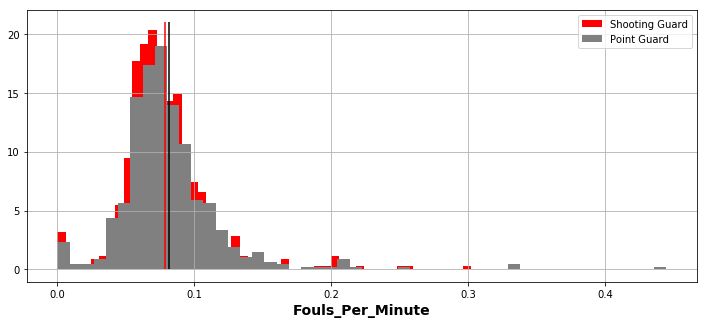

In [19]:
plotByPosition('Fouls_Per_Minute', positions=["Shooting Guard", "Point Guard"], vlen=21, bins=50)

In [20]:
stats.f_oneway(s_shtgrd, s_pwrfwd, s_center, s_smlfwd, s_pntgrd)

#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

#print(stats.ttest_ind(fpmpointguard, fpmshootingguard, equal_var=True))

F_onewayResult(statistic=1.034566587108363e-27, pvalue=1.0)

# Do it for Free Throw %

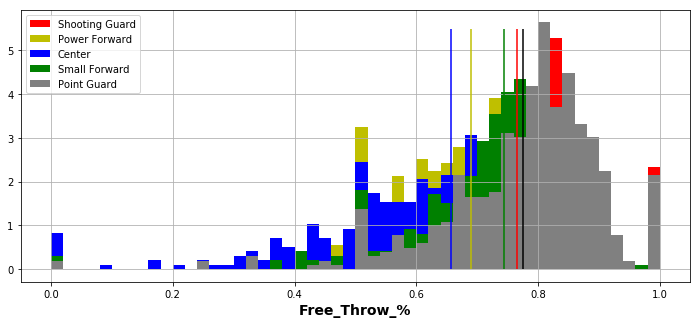

In [21]:
plotByPosition('Free_Throw_%', positions="all", vlen=5.5, bins=50)

In [22]:
%%capture

positions = ['Shooting Guard', 'Power Forward', 'Center', 'Small Forward',
       'Point Guard']
field = 'Free_Throw_%' # not a list!!!

s_shtgrd = df_bball[df_bball['Position'] == positions[0]][field]
s_pwrfwd = df_bball[df_bball['Position'] == positions[1]][field]
s_center = df_bball[df_bball['Position'] == positions[2]][field]
s_smlfwd = df_bball[df_bball['Position'] == positions[3]][field]
s_pntgrd = df_bball[df_bball['Position'] == positions[4]][field]

ss = [s_shtgrd,s_pwrfwd,s_center,s_smlfwd,s_pntgrd]
names = ['s_shtgrd','s_pwrfwd','s_center','s_smlfwd','s_pntgrd']

out_df = pd.DataFrame()
for idx, series in enumerate(ss):
    filtered = filterSeries(series)
    normed = norm_series(filtered)
    out_df[names[idx]] = normed
    
    
s_shtgrd = out_df['s_shtgrd'].dropna()
s_pwrfwd = out_df['s_pwrfwd'].dropna()
s_center = out_df['s_center'].dropna()
s_smlfwd = out_df['s_smlfwd'].dropna()
s_pntgrd = out_df['s_pntgrd'].dropna()

freethrowanova = stats.f_oneway(s_shtgrd, s_pwrfwd, s_center, s_smlfwd, s_pntgrd)

In [23]:
print(freethrowanova)

F_onewayResult(statistic=1.1626856722387277e-27, pvalue=1.0)


In [24]:
# Do it for Points per Minute Played

In [25]:
%%capture

positions = ['Shooting Guard', 'Power Forward', 'Center', 'Small Forward',
       'Point Guard']
field = 'Points' # not a list!!!

s_shtgrd = df_bball[df_bball['Position'] == positions[0]][field]
s_pwrfwd = df_bball[df_bball['Position'] == positions[1]][field]
s_center = df_bball[df_bball['Position'] == positions[2]][field]
s_smlfwd = df_bball[df_bball['Position'] == positions[3]][field]
s_pntgrd = df_bball[df_bball['Position'] == positions[4]][field]

ss = [s_shtgrd,s_pwrfwd,s_center,s_smlfwd,s_pntgrd]
names = ['s_shtgrd','s_pwrfwd','s_center','s_smlfwd','s_pntgrd']

out_df = pd.DataFrame()
for idx, series in enumerate(ss):
    filtered = filterSeries(series)
    normed = norm_series(filtered)
    out_df[names[idx]] = normed
    
    
s_shtgrd = out_df['s_shtgrd'].dropna()
s_pwrfwd = out_df['s_pwrfwd'].dropna()
s_center = out_df['s_center'].dropna()
s_smlfwd = out_df['s_smlfwd'].dropna()
s_pntgrd = out_df['s_pntgrd'].dropna()

pointsanova = stats.f_oneway(s_shtgrd, s_pwrfwd, s_center, s_smlfwd, s_pntgrd)

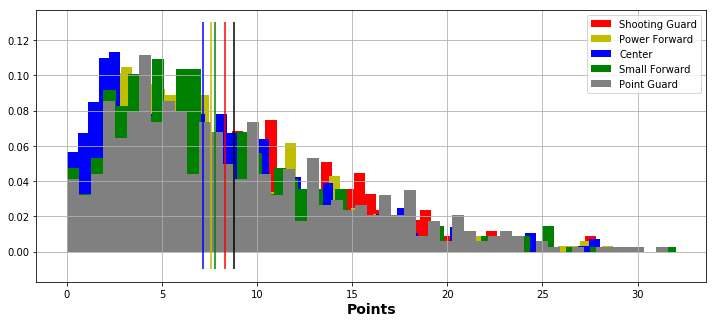

In [26]:
plotByPosition('Points', positions="all", vlen=0.13, bins=50)

In [27]:
print(pointsanova)

F_onewayResult(statistic=1.4353419798792335e-28, pvalue=1.0)


## Summary of findings
- As expected, high correlation between related variables (e.g. field goals attempted and field goals made)
- 1-way ANOVA showed no statistically significant difference in fouls per minute between poisitions. 
- The same test also showed no statistically significant difference in Free point % and points per minute between positions.

## Further exploration
- Loop through anova for every variable to find out if any show significant difference across groups
- Do the same thing for other groupings - team, year, etc.
- Does crime pay? 
    - aka do players with higher personal foul rates get more points
    - and does that vary by position?
    - Chris advised that a linear regression would the best choice so we decided to wait until we learn that